# In this issue,
we try to predict the death or survival of people using medical data recorded from heart patients.
We also try to find the most important predictors of death with the forward selection technique.

# 1
Using the pandas library and numpy, you can first load the heart disease data from a CSV file and examine its columns. Then, using the function np.random.choice, select random samples from two groups of dead and living people.

In [1]:
import pandas as pd
import numpy as np

# Load data from CSV file
data = pd.read_csv('heart_failure.csv')

# Check the data columns
print(data.columns)
print("data: \n",data.describe())

# Determining the number of random samples for each group (dead and alive)
sample_size = 90

# Selection of random samples from the group of dead people
dead_samples = np.random.choice(data[data['DEATH_EVENT'] == 1].index, sample_size, replace=False)

# Selection of random samples from the group of living people
alive_samples = np.random.choice(data[data['DEATH_EVENT'] == 0].index, sample_size, replace=False)

# Descriptive study for selected samples from the group of dead people
dead_samples_data = data.loc[dead_samples]
print("dead_samples_data: \n",dead_samples_data.describe())

# Descriptive study for selected samples from the group of living people
alive_samples_data = data.loc[alive_samples]
print('alive_samples_data : \n',alive_samples_data.describe())


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
data: 
               age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000

# 2,
You can use the seaborn and matplotlib libraries to plot the distribution of different columns in two groups, living and dead. By comparing these graphs, you can understand which variable has the greatest impact on determining whether a patient is alive or dead.

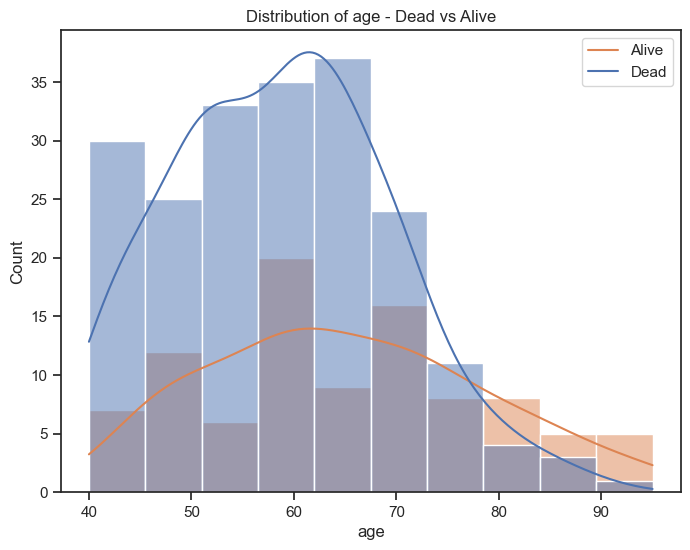

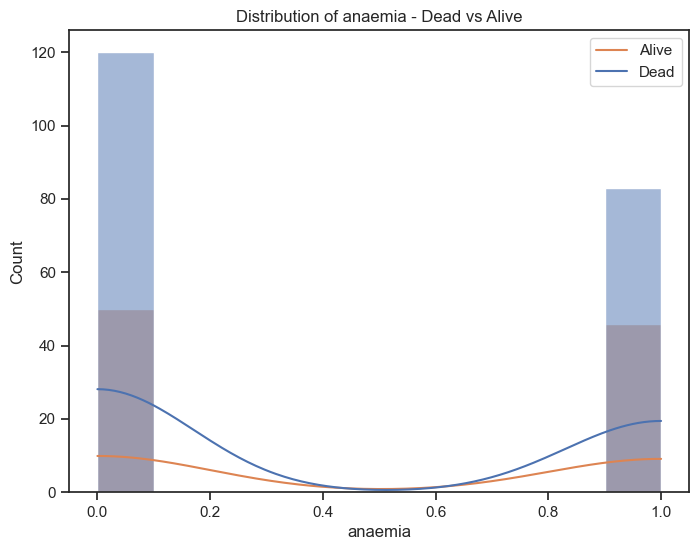

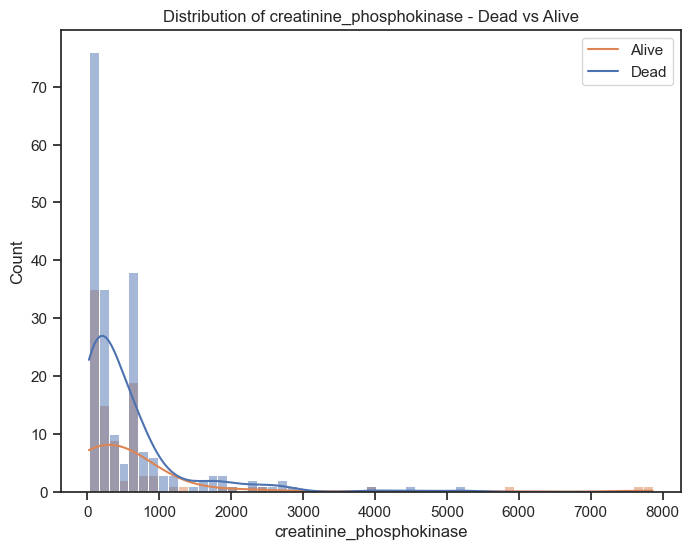

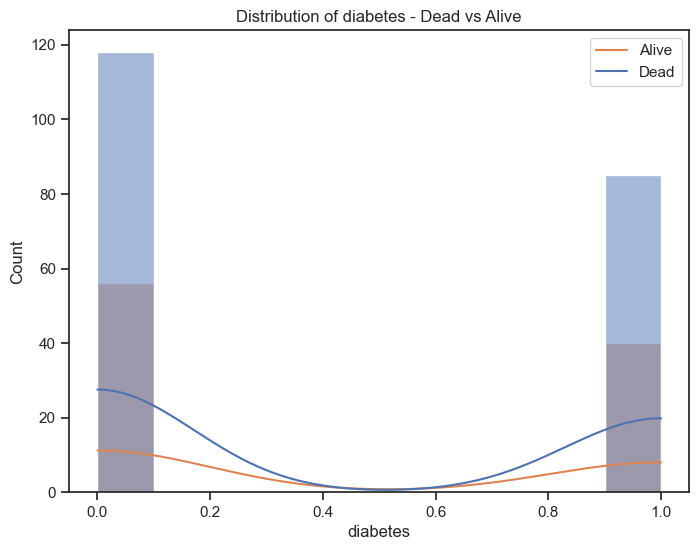

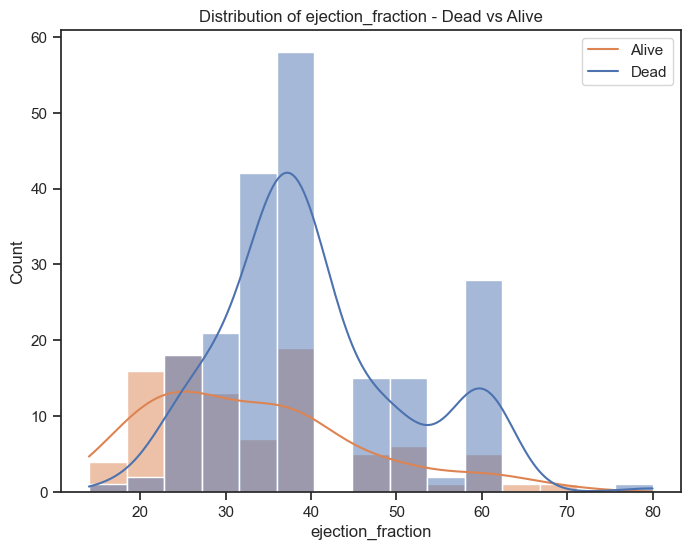

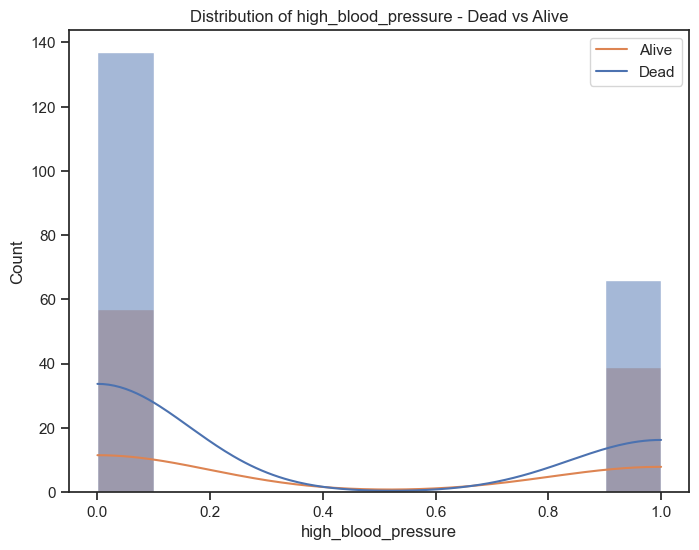

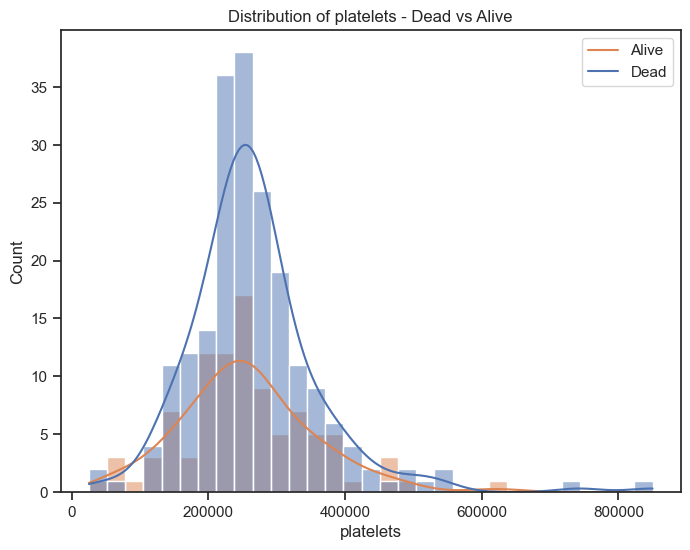

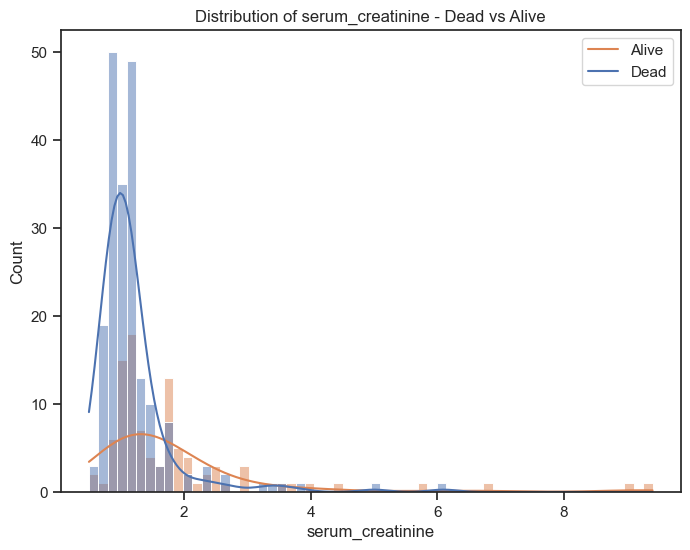

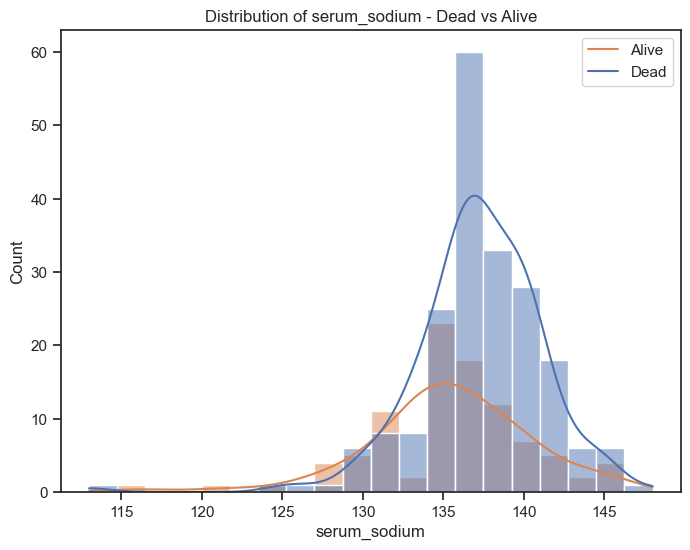

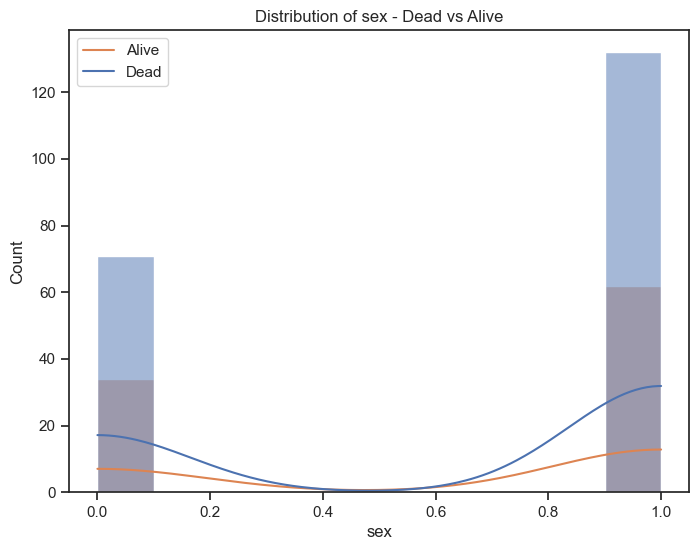

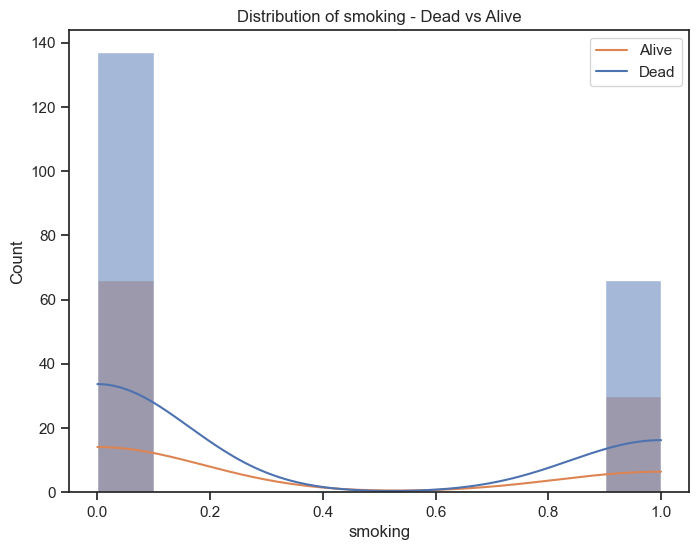

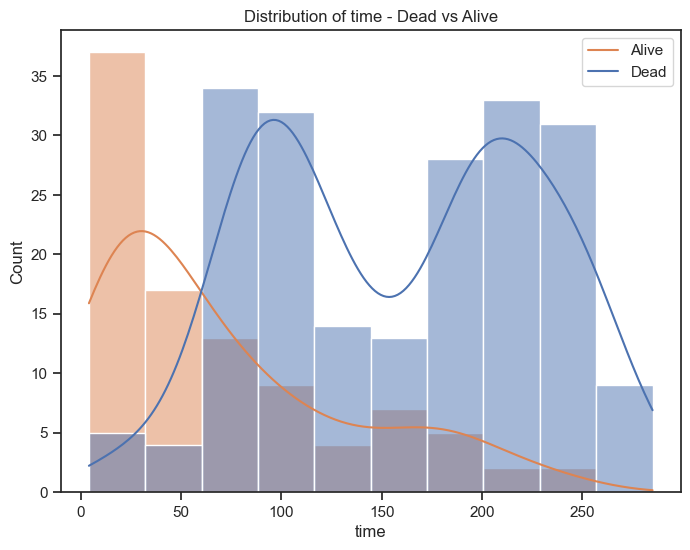

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chart settings
sns.set(style="ticks")

# The desired columns to draw the graph
columns_of_interest = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

# Draw charts
for column in columns_of_interest:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, hue="DEATH_EVENT", kde=True)
    plt.title(f"Distribution of {column} - Dead vs Alive")
    plt.legend(["Alive", "Dead"])
    plt.show()


# 3
To build an SVM model and find the best set of parameters, you can use the scikit-learn and GridSearchCV libraries. Using GridSearchCV, you can examine a combination of parameters and find the best model based on accuracy.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load data from CSV file
data = pd.read_csv('heart_failure.csv')

# Prepare data for SVM model

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('DEATH_EVENT', axis=1), data['DEATH_EVENT'], test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Create SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 0.1, 'gamma': 0.1}
Best Score: 0.7029255319148937


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load data from CSV file
data = pd.read_csv('heart_failure.csv')

# Prepare data for SVM model

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('DEATH_EVENT', axis=1), data['DEATH_EVENT'], test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf','sigmoid']}

# Create SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.7029255319148937


# 4,
Choose one of the columns of the dataset and try to predict whether the variable is alive or dead using only it. For this prediction, use the SVM model with the parameters found in the previous section. - Evaluate Fold Cross-Validation.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Load data from CSV file
data = pd.read_csv('heart_failure.csv')

# Select the column for prediction (e.g., 'age')
X = data[['age']]
y = data['DEATH_EVENT']

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}

# Create SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid)

# Perform K-Fold Cross Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the test data
    accuracy = grid_search.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.6691525423728815


# 5
By repeating the previous section for all columns, which variable performs best in predicting alive or dead
Does it have to be? Why?

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC

# Load data from CSV file
data = pd.read_csv('heart_failure.csv')

# Select the columns for prediction
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
            'sex', 'smoking', 'time']

y = data['DEATH_EVENT']  # Target variable

accuracy_scores = []

for feature in features:
    X = data[[feature]]  # Select the column for prediction

    # Define the parameter grid
    param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}

    # Create SVM model
    svm_model = SVC()

    # Create GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid)

    # Perform K-Fold Cross Validation
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True)

    feature_accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the GridSearchCV object on the training data
        grid_search.fit(X_train, y_train)

        # Evaluate the model on the test data
        accuracy = grid_search.score(X_test, y_test)
        feature_accuracy_scores.append(accuracy)

    # Calculate the mean accuracy across all folds for the current feature
    mean_accuracy = np.mean(feature_accuracy_scores)
    accuracy_scores.append(mean_accuracy)

# Print the accuracy scores for each feature
for i, feature in enumerate(features):
    print("Accuracy for", feature, ":", accuracy_scores[i])


Accuracy for age : 0.6789265536723164
Accuracy for anaemia : 0.6786440677966101
Accuracy for creatinine_phosphokinase : 0.6719774011299435
Accuracy for diabetes : 0.6790395480225988
Accuracy for ejection_fraction : 0.7254802259887005
Accuracy for high_blood_pressure : 0.6789265536723164
Accuracy for platelets : 0.6789830508474576
Accuracy for serum_creatinine : 0.7292655367231639
Accuracy for serum_sodium : 0.6620338983050849
Accuracy for sex : 0.6788700564971751
Accuracy for smoking : 0.6787570621468927
Accuracy for time : 0.68909604519774


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC

# Load data from CSV file
data = pd.read_csv('heart_failure.csv')

# Select the columns for prediction
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
            'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
            'sex', 'smoking', 'time']

y = data['DEATH_EVENT']  # Target variable

accuracy_scores = []

for feature in features:
    X = data[[feature]]  # Select the column for prediction

    # Define the parameter grid
    param_grid = 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['sigmoid']}

    # Create SVM model
    svm_model = SVC()

    # Create GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid)

    # Perform K-Fold Cross Validation
    k = 5  # Number of folds
    kf = KFold(n_splits=k, shuffle=True)

    feature_accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the GridSearchCV object on the training data
        grid_search.fit(X_train, y_train)

        # Evaluate the model on the test data
        accuracy = grid_search.score(X_test, y_test)
        feature_accuracy_scores.append(accuracy)

    # Calculate the mean accuracy across all folds for the current feature
    mean_accuracy = np.mean(feature_accuracy_scores)
    accuracy_scores.append(mean_accuracy)

# Print the accuracy scores for each feature
for i, feature in enumerate(features):
    print("Accuracy for", feature, ":", accuracy_scores[i])


Accuracy for age : 0.6789265536723164
Accuracy for anaemia : 0.6785310734463276
Accuracy for creatinine_phosphokinase : 0.67909604519774
Accuracy for diabetes : 0.6789830508474577
Accuracy for ejection_fraction : 0.6789265536723164
Accuracy for high_blood_pressure : 0.6787005649717515
Accuracy for platelets : 0.6789830508474576
Accuracy for serum_creatinine : 0.6789265536723164
Accuracy for serum_sodium : 0.6788700564971751
Accuracy for sex : 0.6792090395480226
Accuracy for smoking : 0.6788135593220339
Accuracy for time : 0.6789265536723164


# 6
Now use two variables to predict death, one of which is the variable obtained in the previous section
The combination of these two variables provides the most accurate prediction of whether patients are dead or alive. Can it be said that these two variables are the most important factors involved in the death of heart patients?

In [10]:
best_combination = ''
best_accuracy = 0

for feature in features:
    if feature != 'serum_creatinine':
        X = data[['serum_creatinine', feature]]  # Select the columns for prediction

        # Define the parameter grid
        param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}

        # Create SVM model
        svm_model = SVC()

        # Create GridSearchCV object
        grid_search = GridSearchCV(svm_model, param_grid)

        # Perform K-Fold Cross Validation
        k = 5  # Number of folds
        kf = KFold(n_splits=k, shuffle=True)

        accuracy_scores = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit the GridSearchCV object on the training data
            grid_search.fit(X_train, y_train)

            # Evaluate the model on the test data
            accuracy = grid_search.score(X_test, y_test)
            accuracy_scores.append(accuracy)

        # Calculate the mean accuracy across all folds for the current feature combination
        mean_accuracy = np.mean(accuracy_scores)

        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_combination = 'serum_creatinine + ' + feature

print("Best combination:", best_combination)
print("Best accuracy:", best_accuracy)


Best combination: serum_creatinine + anaemia
Best accuracy: 0.7391525423728813
